In [1]:
import pandas as pd
import matplotlib as mtb
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np


# Titanic – Analiza przeżywalności pasażerów

O danych – opis zbioru Titanic

Zbiór danych o pasażerach **RMS Titanic**, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą lodową, jest jednym z najbardziej znanych zestawów używanych w analizie danych i uczeniu maszynowym. Dane obejmują cechy demograficzne, informacje o podróży oraz status przeżycia pasażerów.

- **Liczba rekordów:** 1310 pasażerów  
- **Procent przeżycia:** 38,2%  
- **Liczba kobiet:** 466  
- **Liczba mężczyzn:** 843  

---

### Kolumny w zbiorze danych

| Nazwa kolumny | Opis | Typ danych |
|---------------|------|------------|
| `pclass`      | Klasa biletu (1 = 1 klasa, 2 = 2 klasa, 3 = 3 klasa) | liczba/kategoria |
| `survived`    | Status przeżycia (0 = nie, 1 = tak) | liczba/kategoria |
| `name`        | Imię i nazwisko pasażera | tekst |
| `sex`         | Płeć pasażera | kategoria |
| `age`         | Wiek pasażera w latach | liczba |
| `sibsp`       | Liczba rodzeństwa/małżonków na pokładzie | liczba |
| `parch`       | Liczba rodziców/dzieci na pokładzie | liczba |
| `ticket`      | Numer biletu | tekst |
| `fare`        | Cena biletu | liczba |
| `cabin`       | Numer kabiny (jeśli znany) | tekst |
| `embarked`    | Port zaokrętowania (C = Cherbourg, Q = Queenstown, S = Southampton) | kategoria |
| `boat`        | Numer łodzi ratunkowej | tekst |
| `body`        | Numer ciała (dla ofiar) | liczba |
| `home.dest`   | Miejsce docelowe pasażera | tekst |




## Wczytanie danych z pliku

In [2]:
# Wczytanie danych z pliku CSV
df = pd.read_csv('26__titanic.csv', sep=",")

# Podstawowe informacje o zbiorze danych
print("=== PODSTAWOWE INFORMACJE O ZBIORZE DANYCH ===")
print(f"Wymiary danych: {df.shape[0]} wierszy, {df.shape[1]} kolumn")
print(f"Liczba pasażerów: {len(df)}")
print(f"Liczba ocalałych: {df['survived'].sum()}")
print(f"Liczba ofiar: {len(df) - df['survived'].sum()}")
print(f"Procent przeżycia: {df['survived'].mean():.1%}")

# Wyświetlenie pierwszych 5 wierszy
print("\n=== PIERWSZE 5 WIERSZY ===")
df.head()

=== PODSTAWOWE INFORMACJE O ZBIORZE DANYCH ===
Wymiary danych: 1310 wierszy, 14 kolumn
Liczba pasażerów: 1310
Liczba ocalałych: 500.0
Liczba ofiar: 810.0
Procent przeżycia: 38.2%

=== PIERWSZE 5 WIERSZY ===


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Analiza brakujących danych

In [3]:
## ANALIZA BRAKUJĄCYCH DANYCH

# Sprawdzenie brakujących danych
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

# Wyświetlenie kolumn z brakującymi danymi
print("=== BRAKUJĄCE DANE ===")
for col in df.columns:
    if missing_data[col] > 0:
        print(f"{col}: {missing_data[col]} ({missing_percent[col]:.1f}%)")

print(f"\nCałkowita liczba brakujących wartości: {missing_data.sum()}")

=== BRAKUJĄCE DANE ===
pclass: 1 (0.1%)
survived: 1 (0.1%)
name: 1 (0.1%)
sex: 1 (0.1%)
age: 264 (20.2%)
sibsp: 1 (0.1%)
parch: 1 (0.1%)
ticket: 1 (0.1%)
fare: 2 (0.2%)
cabin: 1015 (77.5%)
embarked: 3 (0.2%)
boat: 824 (62.9%)
body: 1189 (90.8%)
home.dest: 565 (43.1%)

Całkowita liczba brakujących wartości: 3869


## Sprawdzenie duplikatów

In [4]:
df[df.duplicated()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


In [5]:
# Podstawowe statystyki
print("=== PODSTAWOWE STATYSTYKI ===")
print(df.describe())

# Kluczowe statystyki
print("\n=== KLUCZOWE STATYSTYKI ===")
print(f"📊 Wiek: średnia {df['age'].mean():.1f} lat, mediana {df['age'].median():.1f} lat")
print(f"💰 Cena biletu: średnia {df['fare'].mean():.2f} funtów, mediana {df['fare'].median():.2f} funtów")
print(f"✅ Przeżycie: {df['survived'].mean():.1%} ({df['survived'].sum()} z {len(df)} pasażerów)")

# Rozkład klas
print(f"�� Klasy: {dict(df['pclass'].value_counts().sort_index())}")

=== PODSTAWOWE STATYSTYKI ===
            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  

=== K

In [6]:
print("=== Usuwamy kolumny 'body', 'cabin', 'boat' z uwagi na duża ilość brakujących danych ===")
df.drop(columns=['body', 'cabin', 'boat'], inplace=True)
df

=== Usuwamy kolumny 'body', 'cabin', 'boat' z uwagi na duża ilość brakujących danych ===


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,C,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,C,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,C,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,S,NaN


## Ogólna przeżywalność pasażerów

In [7]:
df['survived'].value_counts(normalize=True)

survived
0.0    0.618029
1.0    0.381971
Name: proportion, dtype: float64

## Przeżywalność według płci

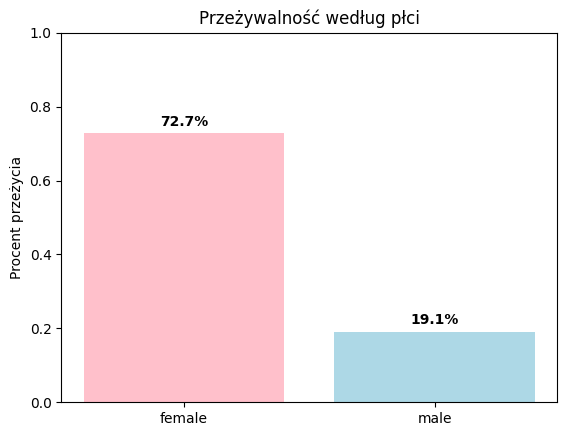

In [8]:
sex_survival = df.groupby('sex')['survived'].mean()
bars = plt.bar(sex_survival.index, sex_survival.values, color=['pink', 'lightblue'])
plt.title('Przeżywalność według płci')
plt.ylabel('Procent przeżycia')
plt.ylim(0, 1)
for i, v in enumerate(sex_survival.values):
    plt.text(i, v + 0.02, f'{v:.1%}', ha='center', fontweight='bold')
plt.show()

## Analiza wieku a przeżywalność

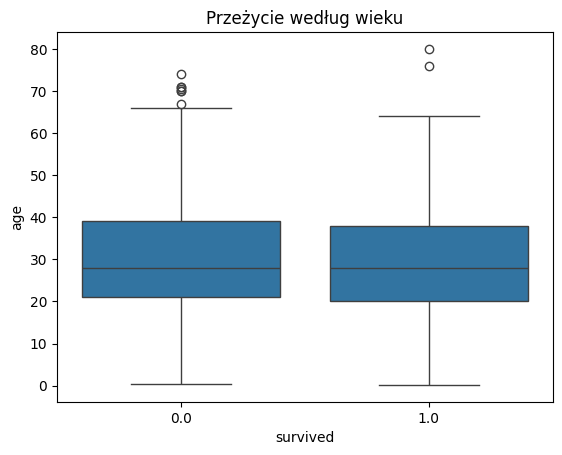

In [9]:
sea.boxplot(data=df, x='survived', y='age')
plt.title("Przeżycie według wieku")
plt.show()

## Przeżywalność dzieci (<15 lat)

=== Przeżywalność dzieci (<15 lat) wg klasy biletu ===
        Liczba dzieci  Procent przeżycia
pclass                                  
1.0                 7               85.7
2.0                27               96.3
3.0                75               38.7


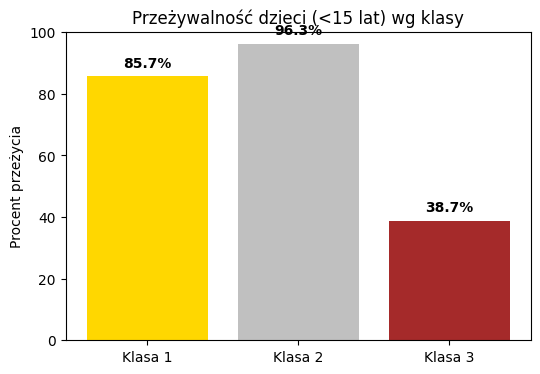

In [10]:
# Filtrujemy dzieci (< 15 lat)
children = df[df['age'] < 15]

# Grupujemy wg klasy i liczymy statystyki
survival_by_class = children.groupby('pclass')['survived'].agg(['count', 'mean'])
survival_by_class.columns = ['Liczba dzieci', 'Procent przeżycia']
survival_by_class['Procent przeżycia'] = (survival_by_class['Procent przeżycia'] * 100).round(1)

# Wyświetlenie tabeli
print("=== Przeżywalność dzieci (<15 lat) wg klasy biletu ===")
print(survival_by_class)

# Wizualizacja
plt.figure(figsize=(6,4))
bars = plt.bar([f'Klasa {int(i)}' for i in survival_by_class.index],
               survival_by_class['Procent przeżycia'],
               color=['gold', 'silver', 'brown'])
plt.title('Przeżywalność dzieci (<15 lat) wg klasy')
plt.ylabel('Procent przeżycia')
plt.ylim(0, 100)

# Dodanie wartości na słupkach
for bar, percentage in zip(bars, survival_by_class['Procent przeżycia']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.show()

## Przeżywalność według klasy biletu

=== OGÓLNA STATYSTYKA PRZEŻYWALNOŚCI ===
🚢 Całkowita liczba pasażerów: 1310
✅ Ocaleni: 500 osób (38.2%)
💀 Ofiary: 809 osób (61.8%)

=== ROZKŁAD KLAS WŚRÓD OCALAŁYCH ===
🎫 Klasa 1: 40.0% ocalałych
🎫 Klasa 2: 23.8% ocalałych
🎫 Klasa 3: 36.2% ocalałych


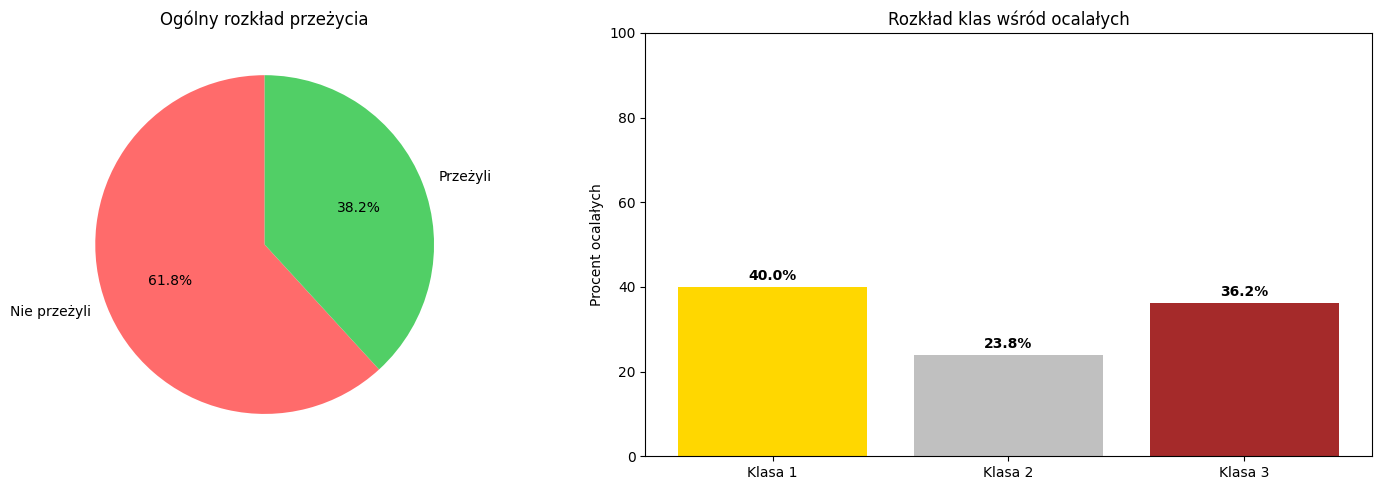


Wniosek: Najwięcej ocalałych pochodziło z Klasy 1 (40.0%), następnie z Klasy 3 (36.2%), a najmniej z Klasy 2 (23.8%).


In [11]:

# Ogólna statystyka przeżycia
survival_stats = df['survived'].value_counts()
survival_percentages = df['survived'].value_counts(normalize=True) * 100

print("=== OGÓLNA STATYSTYKA PRZEŻYWALNOŚCI ===")
print(f"🚢 Całkowita liczba pasażerów: {len(df)}")
print(f"✅ Ocaleni: {survival_stats[1]} osób ({survival_percentages[1]:.1f}%)")
print(f"💀 Ofiary: {survival_stats[0]} osób ({survival_percentages[0]:.1f}%)")

# Rozkład klas wśród ocalałych
survivors = df[df['survived'] == 1]
class_distribution = survivors['pclass'].value_counts(normalize=True) * 100
class_distribution = class_distribution.sort_index()  # sortujemy wg numeru klasy

print("\n=== ROZKŁAD KLAS WŚRÓD OCALAŁYCH ===")
for cls, perc in class_distribution.items():
    print(f"🎫 Klasa {int(cls)}: {perc:.1f}% ocalałych")

# Wizualizacja
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Wykres kołowy - ogólne przeżycie
labels = ['Nie przeżyli', 'Przeżyli']
colors = ['#ff6b6b', '#51cf66']
sizes = [survival_stats[0], survival_stats[1]]

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Ogólny rozkład przeżycia')

# Wykres słupkowy - rozkład klas wśród ocalałych
bars = ax2.bar([f'Klasa {int(i)}' for i in class_distribution.index], 
               class_distribution.values, 
               color=['gold', 'silver', 'brown'])
ax2.set_title('Rozkład klas wśród ocalałych')
ax2.set_ylabel('Procent ocalałych')
ax2.set_ylim(0, 100)

# Dodanie wartości nad słupkami
for bar, percentage in zip(bars, class_distribution.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Wniosek
print(f"\nWniosek: Najwięcej ocalałych pochodziło z Klasy 1 ({class_distribution.loc[1]:.1f}%), "
      f"następnie z Klasy 3 ({class_distribution.loc[3]:.1f}%), a najmniej z Klasy 2 ({class_distribution.loc[2]:.1f}%).")


## Przeżywalność według portu zaokrętowania

=== Przeżywalność wg portu zaokrętowania ===
                 Port  Liczba pasażerów  Procent przeżycia
embarked                                                  
C           Cherbourg               270               55.6
Q          Queenstown               123               35.8
S         Southampton               914               33.3


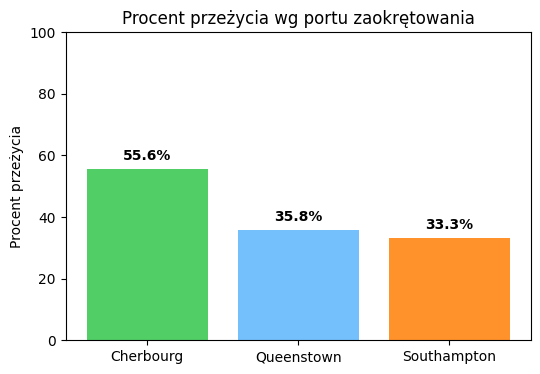


Wniosek: Największą przeżywalność mieli pasażerowie z portu Cherbourg (55.6%).


In [12]:
# Mapowanie kodów portów na nazwy
port_names = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}

# Grupowanie i liczenie statystyk
embarked_stats = df.groupby('embarked')['survived'].agg(['count', 'mean'])
embarked_stats.columns = ['Liczba pasażerów', 'Procent przeżycia']
embarked_stats['Procent przeżycia'] = (embarked_stats['Procent przeżycia'] * 100).round(1)

# Dodanie nazw portów
embarked_stats['Port'] = embarked_stats.index.map(port_names)

# Wyświetlenie tabeli
print("=== Przeżywalność wg portu zaokrętowania ===")
print(embarked_stats[['Port', 'Liczba pasażerów', 'Procent przeżycia']])

# Wizualizacja
plt.figure(figsize=(6,4))
bars = plt.bar(embarked_stats['Port'], embarked_stats['Procent przeżycia'],
               color=['#51cf66', '#74c0fc', '#ff922b'])
plt.title('Procent przeżycia wg portu zaokrętowania')
plt.ylabel('Procent przeżycia')
plt.ylim(0, 100)

# Dodanie wartości na słupkach
for bar, percentage in zip(bars, embarked_stats['Procent przeżycia']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.show()

# Wniosek
best_port = embarked_stats['Procent przeżycia'].idxmax()
print(f"\nWniosek: Największą przeżywalność mieli pasażerowie z portu {port_names[best_port]} "
      f"({embarked_stats.loc[best_port, 'Procent przeżycia']}%).")


## Przeżywalność według wielkości rodziny

=== Przeżywalność według wielkości rodziny ===
            Liczba pasażerów  Procent przeżycia
FamilySize                                     
0.0                      790               30.3
1.0                      235               53.6
2.0                      159               56.6
3.0                       43               69.8
4.0                       22               27.3
5.0                       25               20.0
6.0                       16               25.0
7.0                        8                0.0
10.0                      11                0.0


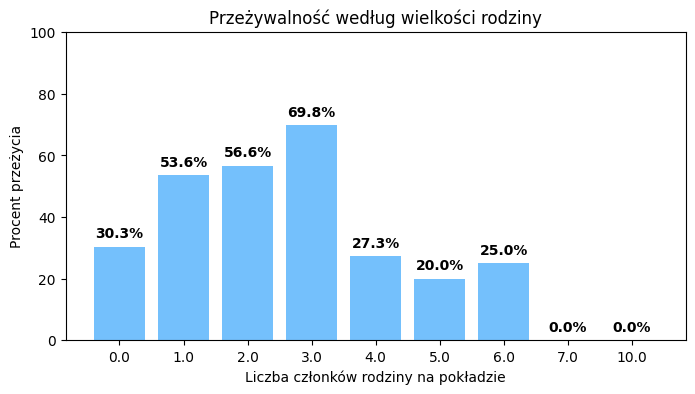


Wniosek: Najwyższą przeżywalność miały rodziny 3-osobowe (69%), a samotne osoby i rodziny liczące 4-6 osób miały wyraźnie niższą przeżywalność.


In [13]:

# Tworzymy kolumnę FamilySize (rodzeństwo/małżonkowie + rodzice/dzieci)
df['FamilySize'] = df['sibsp'] + df['parch']

# Grupowanie i statystyki
family_stats = df.groupby('FamilySize')['survived'].agg(['count', 'mean'])
family_stats.columns = ['Liczba pasażerów', 'Procent przeżycia']
family_stats['Procent przeżycia'] = (family_stats['Procent przeżycia'] * 100).round(1)

# Wyświetlenie tabeli
print("=== Przeżywalność według wielkości rodziny ===")
print(family_stats)

# Wizualizacja
plt.figure(figsize=(8,4))
bars = plt.bar(family_stats.index.astype(str),
               family_stats['Procent przeżycia'],
               color='#74c0fc')
plt.title('Przeżywalność według wielkości rodziny')
plt.xlabel('Liczba członków rodziny na pokładzie')
plt.ylabel('Procent przeżycia')
plt.ylim(0, 100)

# Dodanie wartości procentowych nad słupkami
for bar, percentage in zip(bars, family_stats['Procent przeżycia']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{percentage:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.show()

# Wniosek
print("\nWniosek: Najwyższą przeżywalność miały rodziny 3-osobowe (69%), "
      "a samotne osoby i rodziny liczące 4-6 osób miały wyraźnie niższą przeżywalność.")


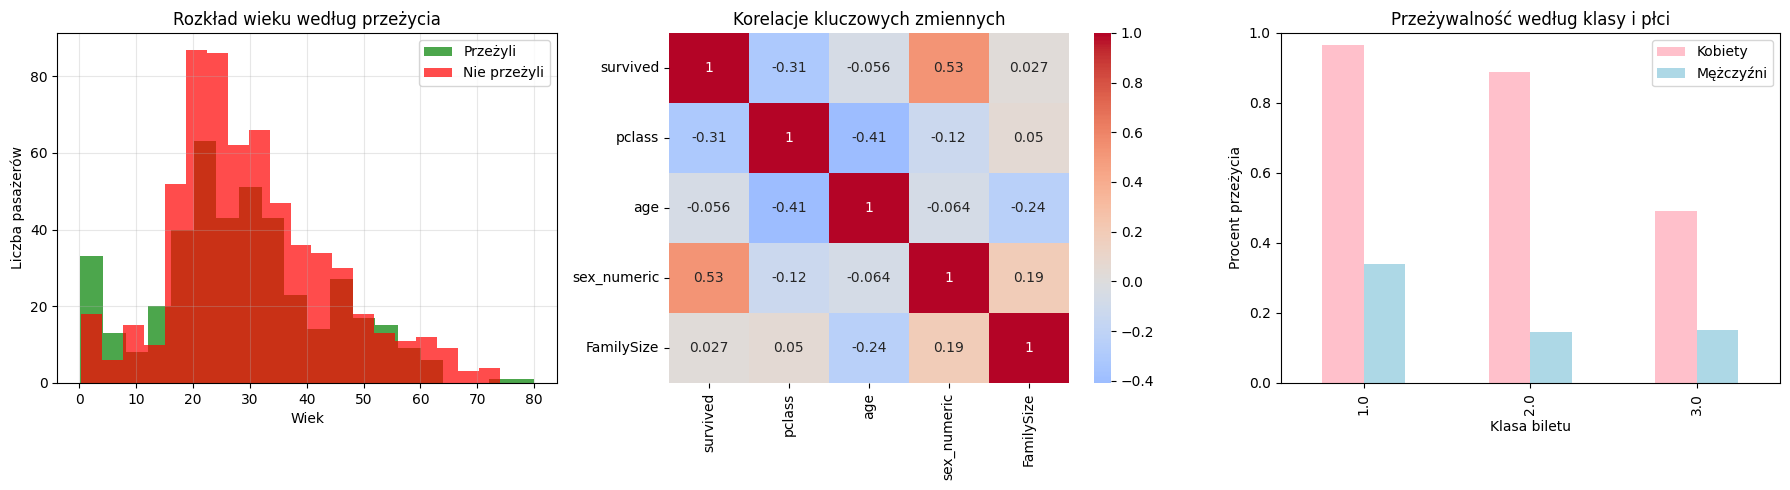

Średni wiek przeżywających: 28.9 lat
Średni wiek nieprzeżywających: 30.5 lat
Najsilniejsza korelacja: Płeć ↔ Przeżycie: 0.529


In [14]:
## ULEPSZONE WIZUALIZACJE - KLUCZOWE ANALIZY

# 1. Rozkład wieku według przeżycia (ulepszona wersja)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram wieku przeżywających vs nieprzeżywających
survived_age = df[df['survived'] == 1]['age'].dropna()
not_survived_age = df[df['survived'] == 0]['age'].dropna()

axes[0].hist(survived_age, bins=20, alpha=0.7, label='Przeżyli', color='green')
axes[0].hist(not_survived_age, bins=20, alpha=0.7, label='Nie przeżyli', color='red')
axes[0].set_title('Rozkład wieku według przeżycia')
axes[0].set_xlabel('Wiek')
axes[0].set_ylabel('Liczba pasażerów')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Heatmapa korelacji (najważniejsze zmienne)
df_corr = df.copy()
df_corr['sex_numeric'] = df_corr['sex'].map({'female': 1, 'male': 0})
correlation_columns = ['survived', 'pclass', 'age', 'sex_numeric', 'FamilySize']
correlation_matrix = df_corr[correlation_columns].corr()

sea.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1])
axes[1].set_title('Korelacje kluczowych zmiennych')

# 3. Przeżywalność według klasy i płci (ulepszona wersja)
class_sex_survival = df.groupby(['pclass', 'sex'])['survived'].mean().unstack()
class_sex_survival.plot(kind='bar', ax=axes[2], color=['pink', 'lightblue'])
axes[2].set_title('Przeżywalność według klasy i płci')
axes[2].set_xlabel('Klasa biletu')
axes[2].set_ylabel('Procent przeżycia')
axes[2].legend(['Kobiety', 'Mężczyźni'])
axes[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Statystyki
print(f"Średni wiek przeżywających: {df[df['survived']==1]['age'].mean():.1f} lat")
print(f"Średni wiek nieprzeżywających: {df[df['survived']==0]['age'].mean():.1f} lat")
print(f"Najsilniejsza korelacja: Płeć ↔ Przeżycie: {correlation_matrix.loc['survived', 'sex_numeric']:.3f}")

## Podsumowanie analizy

1. Katastrofę przetrwało około **38% pasażerów**.
2. Wśród ocalałych aż **72,7% stanowiły kobiety**, co wskazuje na znaczący wpływ płci.
3. **Wiek nie miał dużego wpływu na przeżycie**, z wyjątkiem dzieci poniżej 15 roku życia – z nich **55% przeżyło**, głównie z klas 1 i 2; w klasie 3 przeżywalność dzieci wynosiła jedynie **39%**.
4. **Klasa biletu** miała istotny wpływ – pasażerowie z **klasy 1** mieli największe szanse na przetrwanie.
5. **Port zaokrętowania** również miał znaczenie – najwyższą przeżywalność odnotowano wśród pasażerów wsiadających w Cherbourgu.
6. **Wielkość rodziny** wpływała na przeżycie – osoby podróżujące w małych rodzinach (1–3 osoby) radziły sobie lepiej niż te w bardzo dużych grupach (4+ osoby).

---

Dane z Titanica pokazują, jak **różne czynniki demograficzne i społeczne** – w tym płeć, wiek, status rodzinny i finansowy – mogły decydować o szansach przetrwania w trakcie katastrofy.
